## Business Case : Yulu - Hypothesis Testing

# Yulu  :

Yulu is an Indian micro-mobility service founded in 2017 that provides electric bikes and bicycles for rent, aimed at making urban commuting more sustainable and affordable. Users can rent these vehicles via a mobile app, which allows them to locate and unlock bikes using QR codes. Yulu operates in cities like Bangalore, Delhi, and Mumbai, focusing on reducing traffic congestion and pollution. The company uses a dockless model with easy battery-swapping options to ensure the availability of its electric vehicles.

## Business Problem :

The company wants to know that Which variables play a crucial role in forecasting the demand for shared electric cycles in the Indian market, and how effectively do these variables explain the variations in electric cycle demand?

In [ ]:
#Required Libraries importing:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas_profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=575dc2e826af25ad1a9e2b4ee575fbbdec08e602c983d36fc5803fc861d67e8d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Downlading The Given "YULU" Dataset :

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 10.2MB/s]


In [ ]:
df=pd.read_csv("/content/bike_sharing.csv?1642089089")
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Exploratory Data Analysis:**

a. Examine dataset structure, characteristics, and statistical summary.

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.size

130632

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [ ]:
df.describe(include='object')

datetime
count                 10886
unique                10886
top     2011-01-01 00:00:00
freq                      1

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

Insight:Retreving first 5 rows of the data

In [ ]:
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

Insight:Retrieving last 5 rows of the data

b. Identify missing values and perform Imputation using an appropriate method.

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Insights: Observed no null values present in the given dataset.

C.Identify and remove duplicate records.

In [ ]:
df.duplicated().sum()

0

Insights:Observed that there is no duplicated values present in the given dataset.

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df.head(3)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32

d. Analyzing the distribution of Numerical & Categorical variables, separately

Note: -
season: 1: spring, 2: summer, 3: fall, 4: winter

In [ ]:
df["datetime"] =pd.to_datetime(df['datetime'])

In [ ]:
def seasons_name(x):
  if x == 1:
    return "spring"
  elif x == 2:
    return 'summer'
  elif x == 3:
    return "fall"
  else:
    return "winter"

In [ ]:
df['season'] = df['season'].apply(seasons_name)

In [ ]:
df.sample(10)

datetime  season  holiday  workingday  weather   temp   atemp  \
9872 2012-10-15 17:00:00  winter        0           1        1  22.96  26.515   
9196 2012-09-06 13:00:00    fall        0           1        2  29.52  34.850   
3078 2011-07-17 04:00:00    fall        0           0        1  25.42  29.545   
2189 2011-05-18 03:00:00  summer        0           1        3  21.32  25.000   
4176 2011-10-06 01:00:00  winter        0           1        1  19.68  23.485   
5233 2011-12-12 03:00:00  winter        0           1        1   7.38  12.120   
1825 2011-05-02 23:00:00  summer        0           1        2  22.96  26.515   
6104 2012-02-10 14:00:00  spring        0           1        2  13.12  16.665   
7321 2012-05-04 10:00:00  summer        0           1        2  25.42  29.545   
6196 2012-02-14 10:00:00  spring        0           1        2  10.66  13.635   

      humidity  windspeed  casual  registered  count  
9872        64    16.9979      96         670    766  
9196        79     7.0015      39         152    191  
3078        73    11.0014       4           6     10  
2189        94    19.9995       6           3      9  
4176        63    12.9980       5          17     22  
5233        74     0.0000       0           2      2  
1825        83    12.9980      16          48     64  
6104        39     6.0032       8         138    146  
7321        73     8.9981      45         154    199  
6196        60     8.9981       8          90     98

In [ ]:
df.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [ ]:
df['season'].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [ ]:
df.season.nunique()

4

holiday : whether day is a holiday or not

In [ ]:
def holiday_or_not(x):
  if x == 0:
    return "No Holiday"
  else:
    return "Holiday"

In [ ]:
df["holiday"] =df["holiday"].apply(holiday_or_not)

In [ ]:
df['holiday'].value_counts()

holiday
No Holiday    10575
Holiday         311
Name: count, dtype: int64

workingday :

if day is neither weekend nor holiday is 1, otherwise is 0.

In [ ]:
def workingday_or_not(x):
  if x==0:
    return "No Working Day"
  else:
    return "Working Day"

In [ ]:
df["workingday"] = df["workingday"].apply(workingday_or_not)

In [ ]:
df["workingday"].value_counts()

workingday
Working Day       7412
No Working Day    3474
Name: count, dtype: int64

weather:

1: Clear, Few clouds, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds

4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

In [ ]:
def weather_mapping(x):
  if x == 1:
    return "Clear"
  elif x == 2:
    return "Cloudy"
  elif x == 3:
    return "Light Rain"
  else:
    return "Heavy Rain"

In [ ]:
df["weather"] = df["weather"].apply(weather_mapping)

In [ ]:
df['weather'].value_counts()

weather
Clear         7192
Cloudy        2834
Light Rain     859
Heavy Rain       1
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      12.799395     36.021955    155.552177    191.574132  
min        0.000000      0.000000      0.000000      1.000000  
25%        7.001500      4.000000     36.000000     42.000000  
50%       12.998000     17.000000    118.000000    145.000000  
75%       16.997900     49.000000    222.000000    284.000000  
max       56.996900    367.000000    886.000000    977.000000  
std        8.164537     49.960477    151.039033    181.144454

Insights :

The dataset contains 10,886 observations of bike rental data, with key statistical metrics summarized below:

Datetime: The data covers the period from January 1, 2011, to December 19, 2012, with the median datetime on January 1, 2012, at 20:30, and an average datetime of December 27, 2011, at 05:56:22.

Temperature (temp): Temperatures range from 0.82°C to 41.00°C, with a mean of 20.23°C, a standard deviation of 7.79°C, and a median of 20.50°C.

"Feels like" Temperature (atemp): The "feels like" temperature ranges from 0.76°C to 45.45°C, with a mean of 23.66°C, a standard deviation of 8.47°C, and a median of 24.24°C.

Humidity: Humidity ranges from 0% to 100%, with an average of 61.89%, a standard deviation of 19.25%, and a median of 62%.

Windspeed: Wind speeds vary between 0 and 56.997 km/h, with an average of 12.80 km/h, a standard deviation of 8.16 km/h, and a median of 13.00 km/h.

Casual Users: The number of casual users ranges from 0 to 367, with a mean of 36.02, a standard deviation of 49.96, and a median of 17.

Registered Users: Registered users vary from 0 to 886, with a mean of 155.55, a standard deviation of 151.04, and a median of 118.

Total Bike Rentals (count): The total hourly bike rentals range from 1 to 977, with an average of 191.57, a standard deviation of 181.14, and a median of 145.

In [ ]:
df.describe(include="object")

season     holiday   workingday weather
count    10886       10886        10886   10886
unique       4           2            2       4
top     winter  No Holiday  Working Day   Clear
freq      2734       10575         7412    7192

Insights :

The dataset contains 10,886 entries and includes four categorical variables: season, holiday, working day, and weather.

The 'season' variable has four categories, with 'winter' being the most frequent, appearing 2,734 times.

The 'holiday' variable is split into two categories, with 'No Holiday' being the dominant category, occurring 10,575 times.

The 'working day' variable also has two categories, with 'Working Day' being the most common, recorded 7,412 times.

The 'weather' variable features four categories, with 'clear' conditions being the most frequent, observed 7,192 times.

In [ ]:
holiday_counts = df.groupby("holiday")["count"].sum()
holiday_counts

holiday
Holiday         57808
No Holiday    2027668
Name: count, dtype: int64

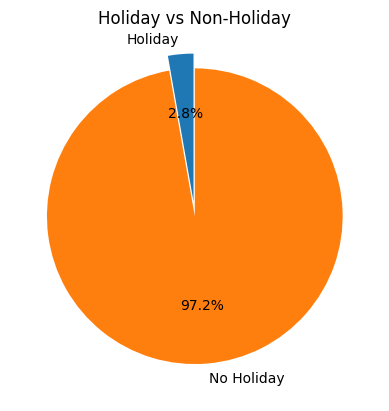

In [ ]:
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%',startangle=90,explode=[0.1, 0])
plt.title("Holiday vs Non-Holiday")
plt.show()

Insights :

In this dataset, approximately 97.2% of the days are non-holidays, and these days show higher bicycle rental counts.

In [ ]:
workingdaycounts = df.groupby("workingday")["count"].sum().reset_index()
workingdaycounts

workingday    count
0  No Working Day   654872
1     Working Day  1430604

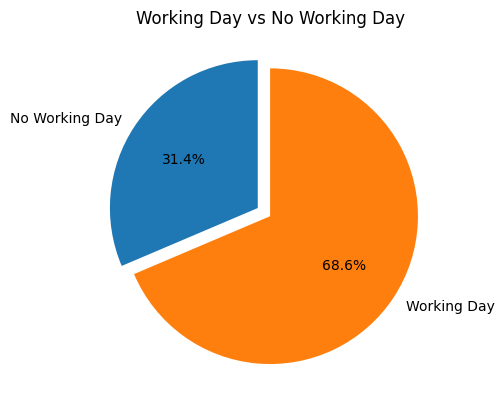

In [ ]:
plt.pie(workingdaycounts["count"], labels=workingdaycounts["workingday"], autopct='%1.1f%%',startangle=90,explode=[0.1, 0])
plt.title("Working Day vs No Working Day")
plt.show()

Insights:

In this dataset, around 68.6% of the days are classified as working days, which tend to have higher bicycle rental counts.

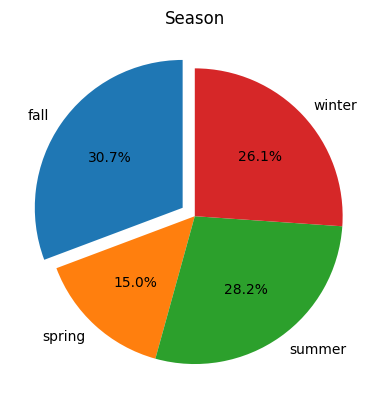

In [ ]:
season_counts=df.groupby("season")["count"].sum().reset_index()
plt.pie(season_counts["count"], labels=season_counts["season"], autopct='%1.1f%%',startangle=90,explode=[0.1, 0,0,0])
plt.title("Season")
plt.show()

Insights : when the season is "fall" bicycle rentals are higher when compared with other seasons.

In [ ]:
weather_counts=df.groupby("weather")["count"].sum().reset_index()
weather_counts

weather    count
0       Clear  1476063
1      Cloudy   507160
2  Heavy Rain      164
3  Light Rain   102089

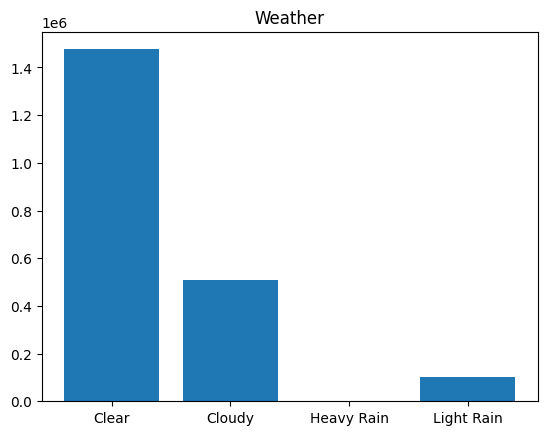

In [ ]:
plt.bar(weather_counts["weather"],weather_counts["count"])
plt.title("Weather")
plt.show()

Insights:

Observed that when the weather is clear, bicycle rentals are higher when we compared with other variations in weather.

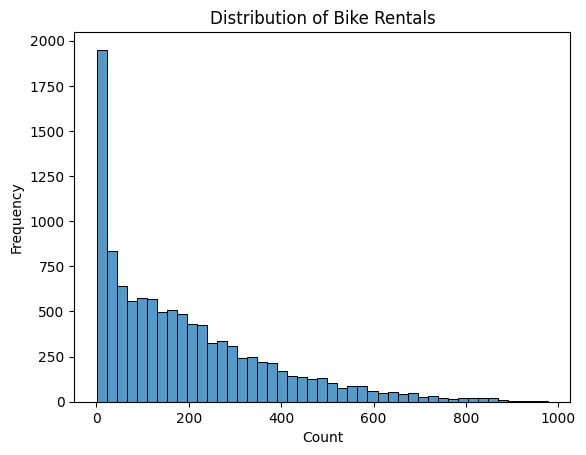

In [ ]:
sns.histplot(df["count"])
plt.title("Distribution of Bike Rentals")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


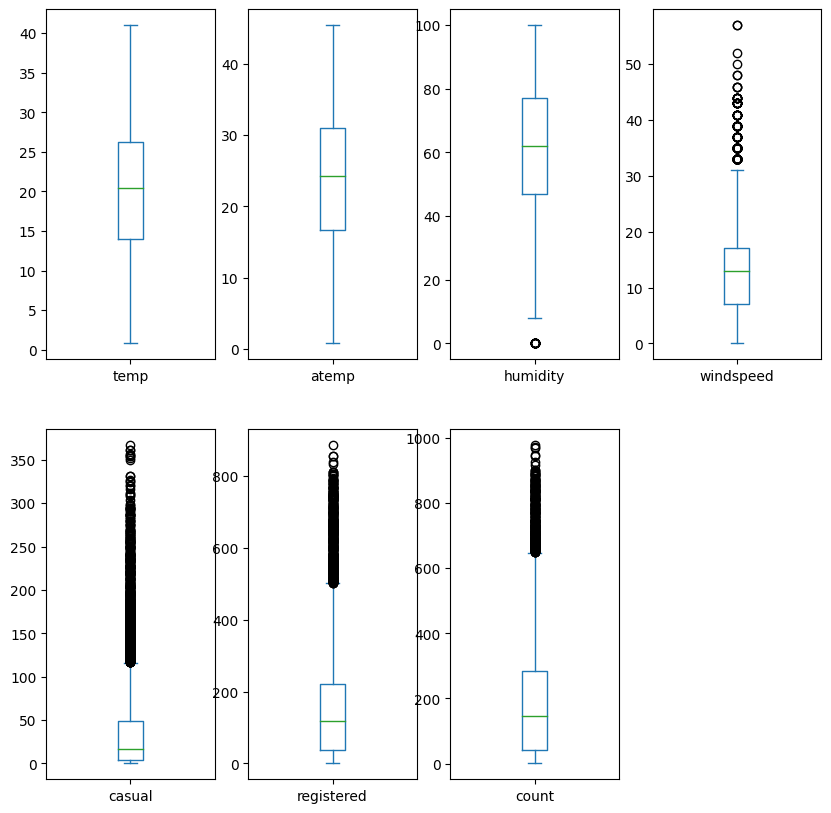

Text(0.5, 0.98, 'Outliers for the attributes')

<Figure size 640x480 with 0 Axes>

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))
plt.show()
plt.suptitle("Outliers for the attributes")

Insights:

Observed that there are significant number of outliers in the casual, registered, count, and windspeed data and
to avoid losing valuable information, we will keep these outliers.

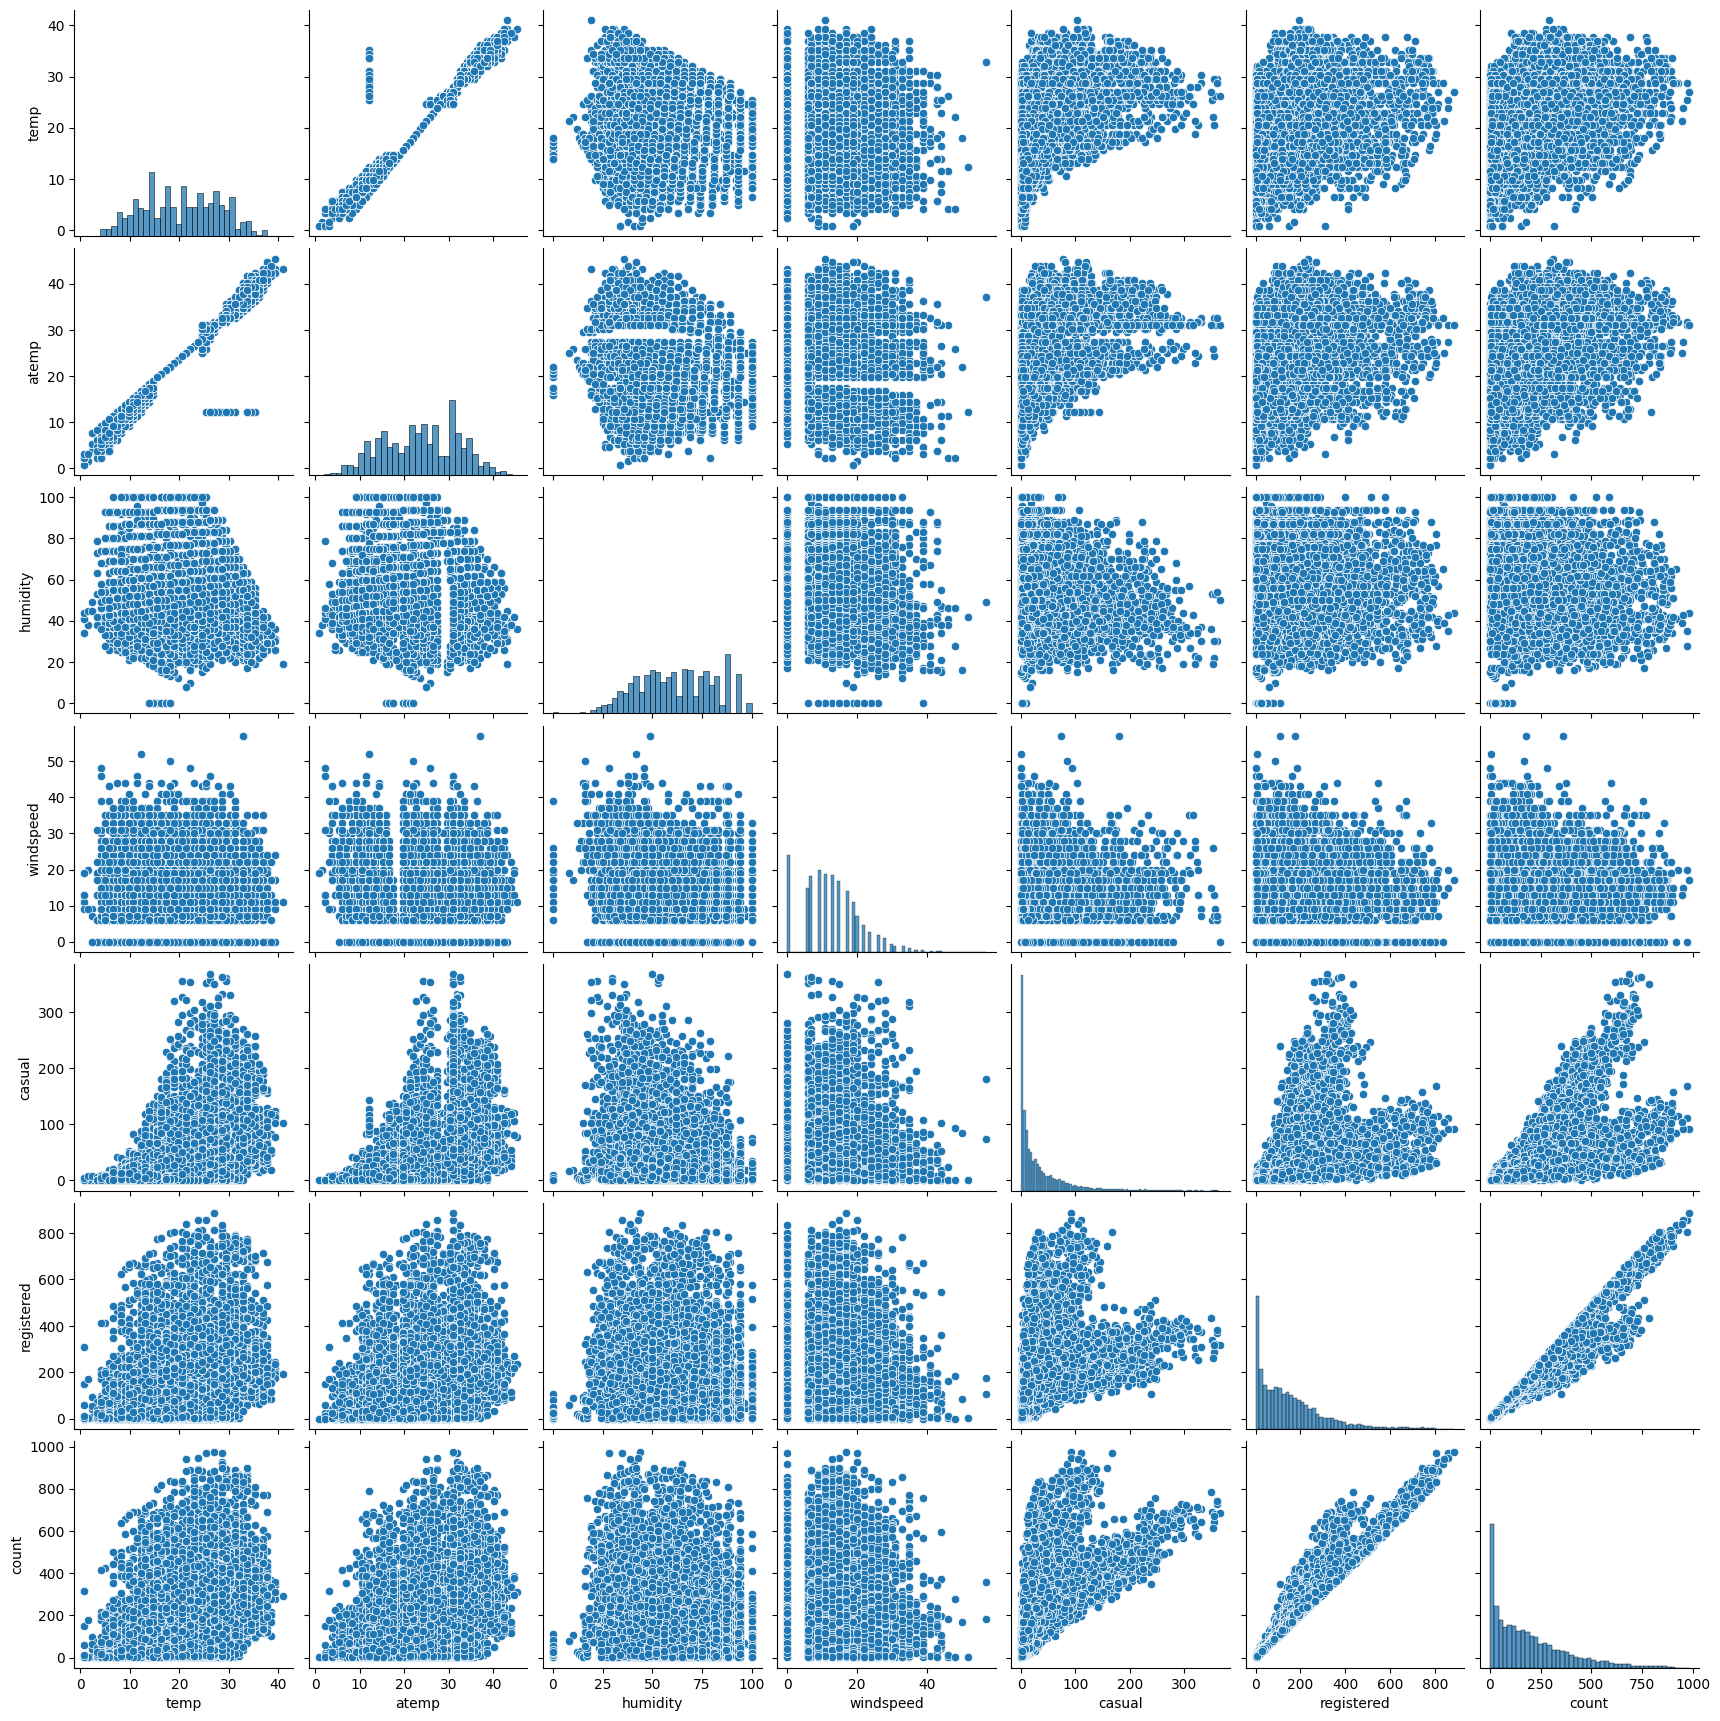

In [ ]:
sns.pairplot(df)

<Axes: >

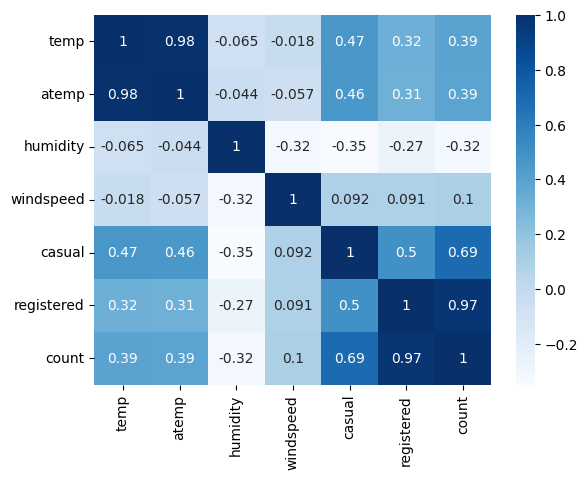

In [ ]:
corr_df=df.select_dtypes(include=['number'])
corr_df.corr()
sns.heatmap(corr_df.corr(),annot=True,cmap='Blues')

Insights:

Observed that "atemp" is highly correlated with "temp" and we can drop that atemp column.

In [ ]:
df.drop(['atemp'],axis=1,inplace=True)

In [ ]:
df["Month"]=df["datetime"].dt.month_name().astype("category")
df["weekday"]=df["datetime"].dt.day_name().astype("category")
df["year"]=df["datetime"].dt.year
df["Day"]=df["datetime"].dt.day
df["Hour"]=df["datetime"].dt.hour

In [ ]:
df.head(2)

datetime  season     holiday      workingday weather  temp  \
0 2011-01-01 00:00:00  spring  No Holiday  No Working Day   Clear  9.84   
1 2011-01-01 01:00:00  spring  No Holiday  No Working Day   Clear  9.02   

   humidity  windspeed  casual  registered  count    Month   weekday  year  \
0        81        0.0       3          13     16  January  Saturday  2011   
1        80        0.0       8          32     40  January  Saturday  2011   

   Day  Hour  
0    1     0  
1    1     1

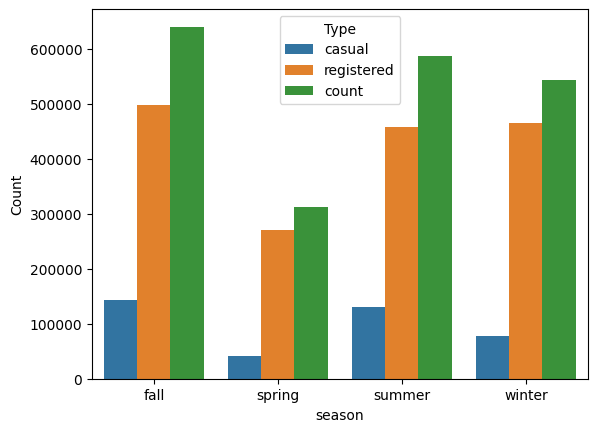

In [ ]:
seasonpercounts=df.groupby('season')[['casual','registered','count']].sum().reset_index()
seasonmelted=pd.melt(seasonpercounts,id_vars=['season'],var_name='Type',value_name='Count')
sns.barplot(x='season',y='Count',data=seasonmelted,hue='Type')
plt.show()


Insights:

Observed that during fall season there is a peak in demand.

winter and summer are both approximately equal in demand.

In spring season lower in demand.


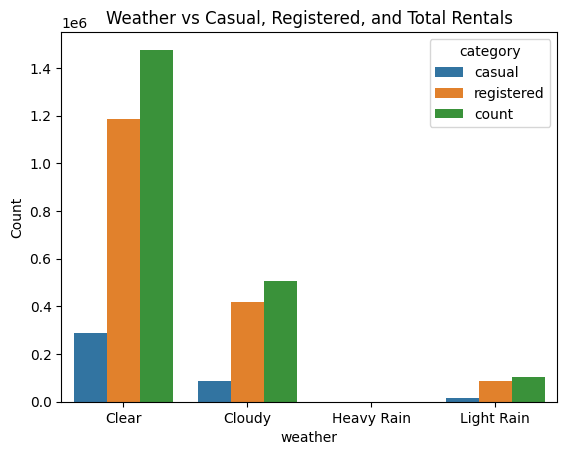

In [ ]:
weatherpercounts=df.groupby("weather")[["casual","registered","count"]].sum().reset_index()
weathermelted=pd.melt(weatherpercounts,id_vars="weather",var_name="category",value_name="Count")
sns.barplot(data=weathermelted,x="weather",y="Count",hue="category")
plt.title("Weather vs Casual, Registered, and Total Rentals")
plt.show()

Insights :"Demand peaked during clear weather conditions and declined progressively as the weather deteriorated."

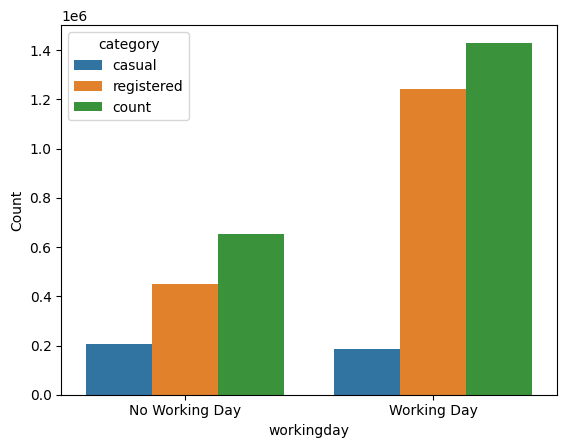

In [ ]:
workingdaypercounts=df.groupby("workingday")[["casual","registered","count"]].sum().reset_index()
workingdaymelted=pd.melt(workingdaypercounts,id_vars="workingday",var_name="category",value_name="Count")
sns.barplot(data=workingdaymelted,x="workingday",y="Count",hue="category")
plt.show()

Insights:Cumulative demand is greater on a weekday.

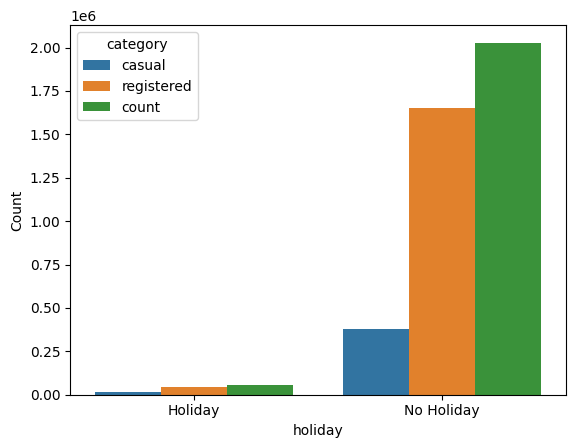

In [ ]:
holidaypercounts=df.groupby("holiday")[["casual","registered","count"]].sum().reset_index()
holidaymelted=pd.melt(holidaypercounts,id_vars="holiday",var_name="category",value_name="Count")
sns.barplot(data=holidaymelted,x="holiday",y="Count",hue="category")
plt.show()

Insights : Demand is more on Non -holiday days

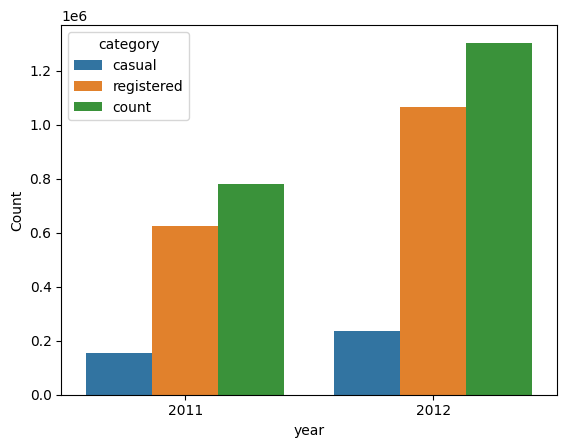

In [ ]:
yearpercounts=df.groupby("year")[["casual","registered","count"]].sum().reset_index()
yearmelted=pd.melt(yearpercounts,id_vars="year",var_name="category",value_name="Count")
sns.barplot(data=yearmelted,x="year",y="Count",hue="category")
plt.show()

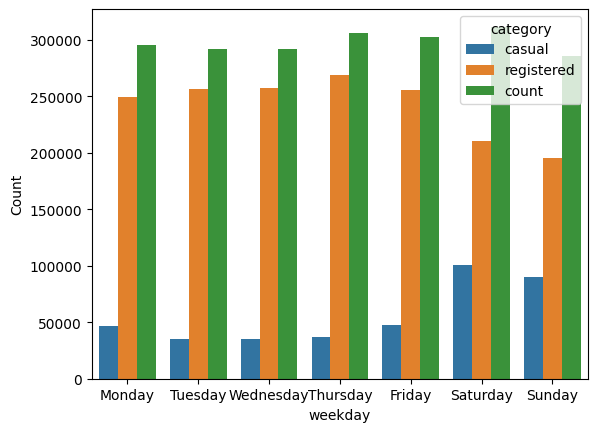

In [ ]:
weekdaypercounts=df.groupby("weekday")[["casual","registered","count"]].sum().reset_index()
weekdaymelted=pd.melt(weekdaypercounts,id_vars="weekday",var_name="category",value_name="Count")
weekdayorder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaymelted['weekday'] = pd.Categorical(weekdaymelted['weekday'], categories=weekdayorder, ordered=True)
sns.barplot(data=weekdaymelted,x="weekday",y="Count",hue="category")
plt.show()

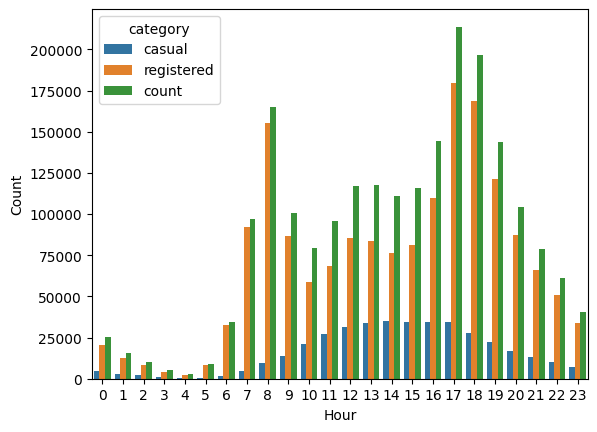

In [ ]:
hourpercounts=df.groupby("Hour")[["casual","registered","count"]].sum().reset_index()
hourmelted=pd.melt(hourpercounts,id_vars="Hour",var_name="category",value_name="Count")
sns.barplot(data=hourmelted,x="Hour",y="Count",hue="category")
plt.show()

Insights:

Bicycle rentals peak in the evening, with high demand also in the morning, though slightly lower.

The afternoon sees moderate demand, while night and late-night hours have the least demand.

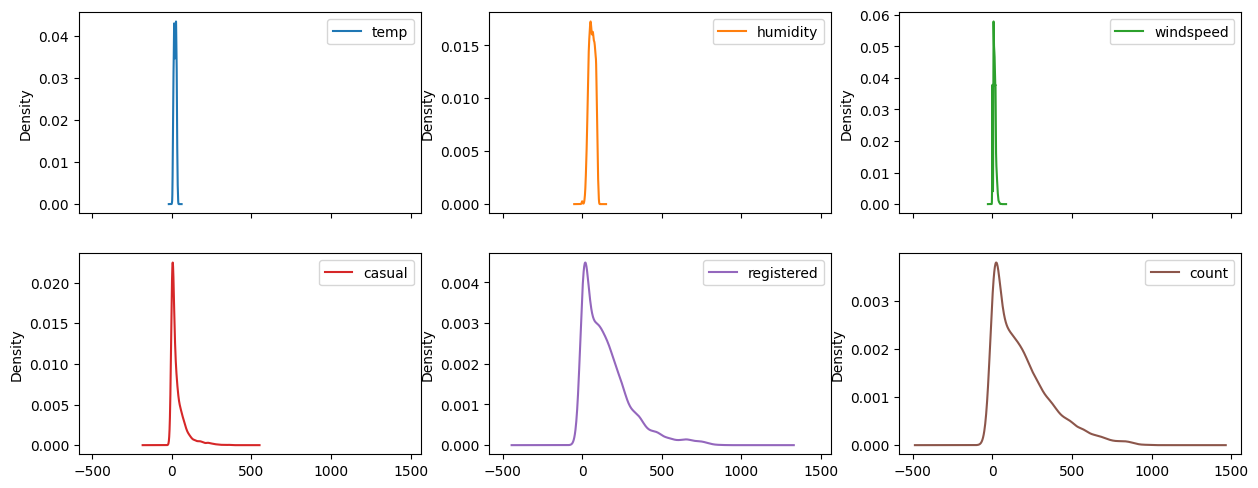

In [ ]:
#Checking Distributions

df.drop(['datetime','Month','Day', 'Hour', 'weekday', 'year'],axis=1).plot(kind='kde',subplots=True,layout=(4,3),figsize=(15,12))
plt.show()

Insights:

Observed that windspeed,casual,registered,count were not normally distributed.

In [ ]:
df.head(2)

datetime  season     holiday      workingday weather  temp  \
0 2011-01-01 00:00:00  spring  No Holiday  No Working Day   Clear  9.84   
1 2011-01-01 01:00:00  spring  No Holiday  No Working Day   Clear  9.02   

   humidity  windspeed  casual  registered  count    Month   weekday  year  \
0        81        0.0       3          13     16  January  Saturday  2011   
1        80        0.0       8          32     40  January  Saturday  2011   

   Day  Hour  
0    1     0  
1    1     1

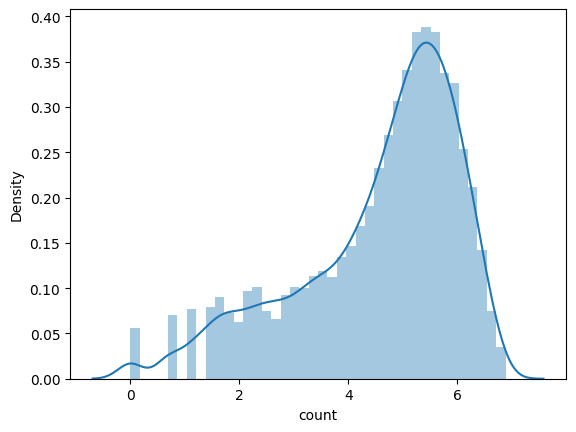

In [ ]:
#To convert skewed distribution to normal distribution ,using lognormal
sns.distplot(np.log(df["count"]))
plt.show()

In [ ]:
#To convert skewed distribution to normal distribution using boxcox
from scipy.stats import boxcox
transformed_value,lambda_value=boxcox(df["count"])
print("Transformed Value:",transformed_value)
print("Lambda Value:",lambda_value)

Transformed Value: [ 4.43314555  6.98267447  6.29227413 ... 12.79939319 11.52196593
  9.85125877]
Lambda Value: 0.3156702511500272


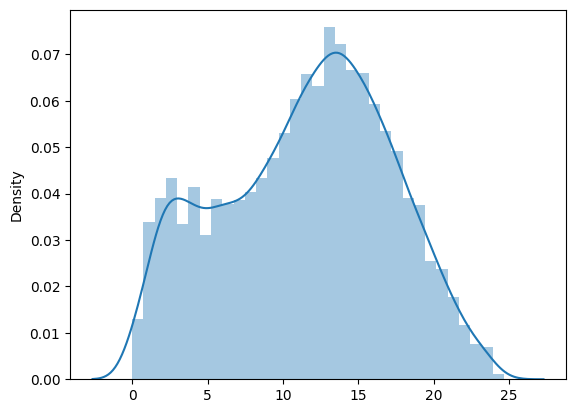

In [ ]:
sns.distplot(transformed_value)
plt.show()

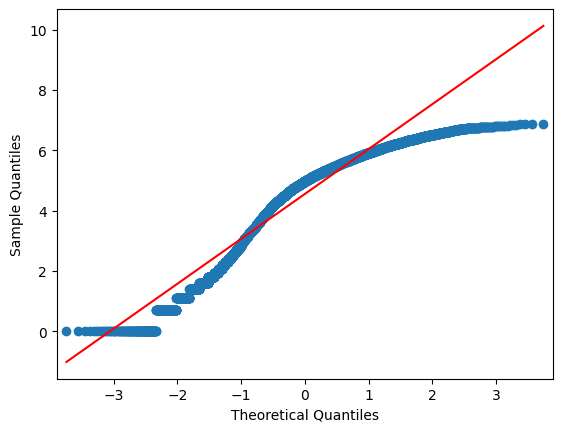

In [ ]:
#qq plot to check normality
from statsmodels.graphics.gofplots import qqplot
qqplot(np.log(df["count"]),line="s")
plt.show()

In [ ]:
#To check normality -using shapiro test
#H0=Data is normally distributed
#HA=Data is not normally distributed
from scipy.stats import shapiro
tstats,pvalue= shapiro(np.log(df["count"]))
print("tstats:",tstats)
print("pvalue:",pvalue)
if pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("Data is not normally distributed")
else:
  print("Accept Null Hypothesis")
  print("Data is normally distributed")

tstats: 0.9154006238583487
pvalue: 8.020775999667864e-61
Reject Null Hypothesis
Data is not normally distributed


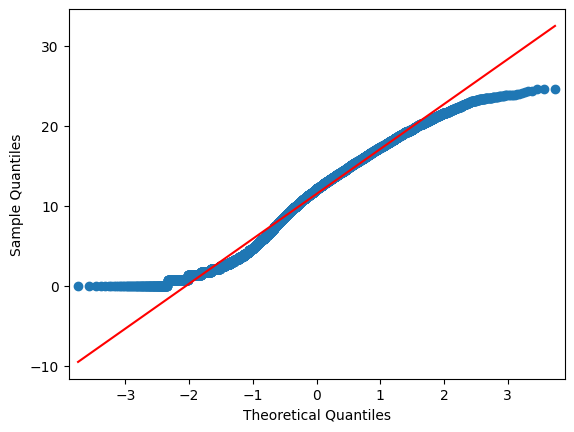

In [ ]:
qqplot(transformed_value,line="s")
plt.show()

In [ ]:
# Shapiro's test to test for normality
# H0 : Data is Gaussian
# Ha : Data is not Gaussian

alpha=0.05

test_stats, p_value = shapiro(transformed_value)
print("Test statistic:",test_stats)
print("p-value:",p_value)

if p_value>alpha:
  print("Data is Gaussian")
else:
  print("Data is not Gaussian")

Test statistic: 0.9789787158306741
p-value: 4.082269779728272e-37
Data is not Gaussian


## 3. Check if there any significant difference between the no. of bike rides on Weekday and Weekends?

In [ ]:
df["weekend"] = df["weekday"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)
df["weekday"] =df["weekday"].apply(lambda x: 1 if x in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] else 0)

In [ ]:
from scipy.stats import ttest_ind,ttest_rel

In [ ]:
#Hypothesis Testing:
# H0 :  there is no significant difference between the no. of bike rides on Weekdays and Weekends
# Ha :  there is significant difference between the no. of bike rides on Weekdays and Weekends
alpha = 0.05
tstats,pvalue=ttest_ind(df[df["weekday"]==1]["count"],df[df["weekend"]==1]["count"])
print("tstats:",tstats)
print("pvalue:",pvalue)
if pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("there is significant difference between the no. of bike rides on Weekdays and Weekends")
else:
  print("Fail to reject Null Hypothesis")
  print("there is no significant difference between the no. of bike rides on Weekdays and Weekends")

tstats: 1.0354386367292092
pvalue: 0.3004871142922829
Fail to reject Null Hypothesis
there is no significant difference between the no. of bike rides on Weekdays and Weekends


Insights :

Observed that the test is "Fail to reject Null Hypothesis" where p>0.05.

There is no significant difference between the no. of bike rides on Weekdays and Weekends

# 4. Check if the demand of bicycles on rent is the same for different Weather conditions?

In [ ]:
df["weather"].value_counts()

weather
Clear         7192
Cloudy        2834
Light Rain     859
Heavy Rain       1
Name: count, dtype: int64

In [ ]:
df_Clear = df[df["weather"]=="Clear"]["count"]
df_Cloudy = df[df["weather"]=="Cloudy"]["count"]
df_Light_Rain = df[df["weather"]=="Light Rain"]["count"]
df_Heavy_Rain = df[df["weather"]=="Heavy Rain"]["count"]

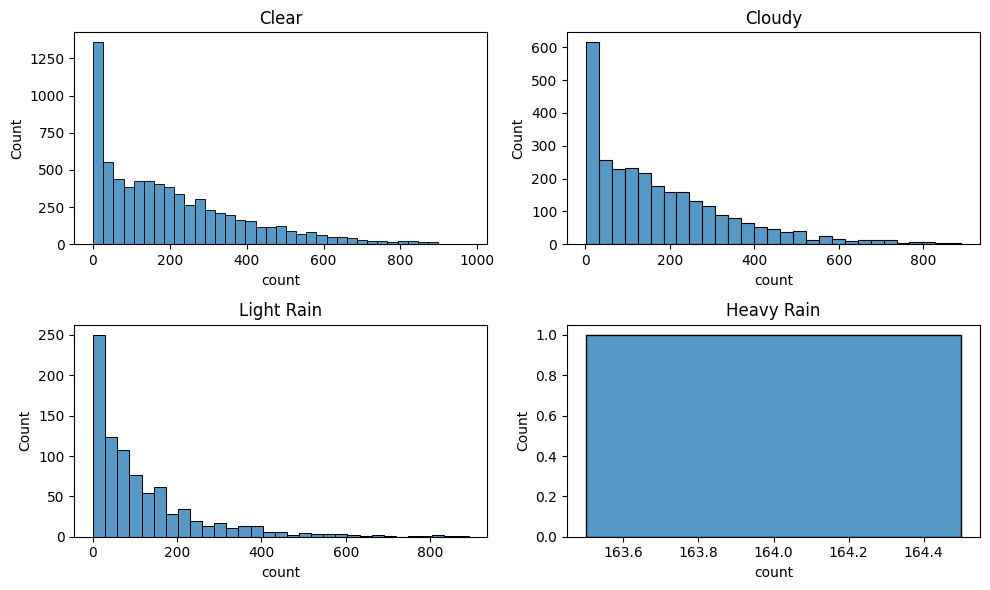

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.histplot(df_Clear)
plt.title("Clear")
plt.subplot(2,2,2)
sns.histplot(df_Cloudy)
plt.title("Cloudy")
plt.subplot(2,2,3)
sns.histplot(df_Light_Rain)
plt.title("Light Rain")
plt.subplot(2,2,4)
sns.histplot(df_Heavy_Rain)
plt.title("Heavy Rain")
plt.tight_layout()
plt.show()


Insights:Observed that the data is not normally distributed...distributions are not normal.

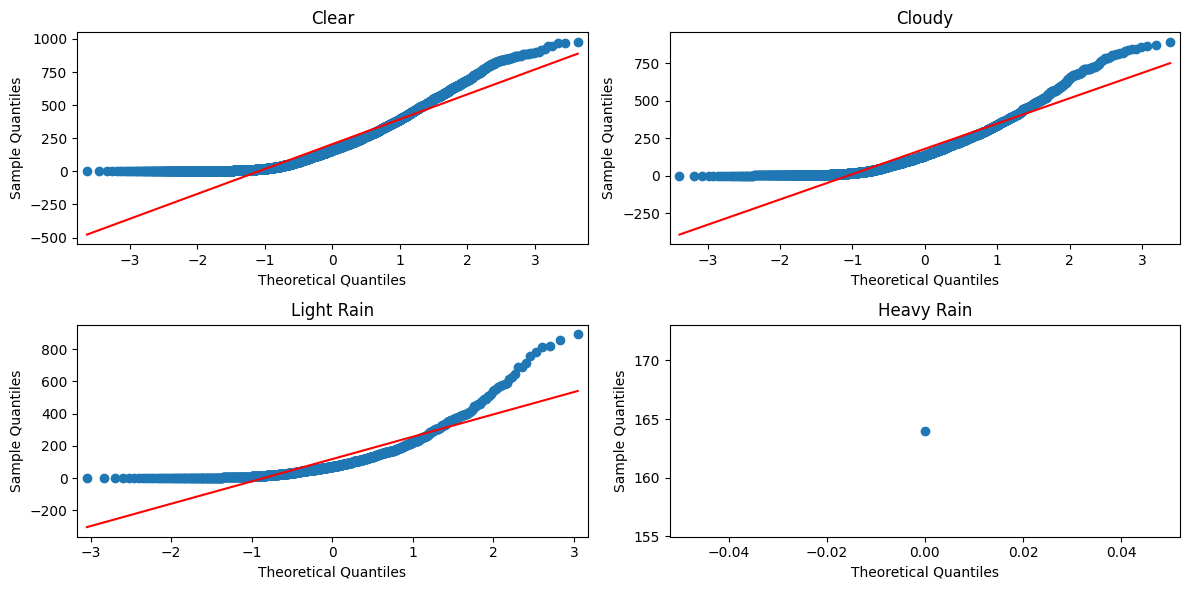

In [ ]:
#Using qqplot ,checking normal distributions for the given  weather conditions
fig,axes=plt.subplots(2,2,figsize=(12,6))  #adjusting figures in a bettersize to fit in 2*2
qqplot(df_Clear,line="s",ax=axes[0,0])
axes[0,0].set_title("Clear")
qqplot(df_Cloudy,line="s",ax=axes[0,1])
axes[0,1].set_title("Cloudy")
qqplot(df_Light_Rain,line="s",ax=axes[1,0])
axes[1,0].set_title("Light Rain")
qqplot(df_Heavy_Rain,line="s",ax=axes[1,1])
axes[1,1].set_title("Heavy Rain")
plt.tight_layout()
plt.show()


Insights:
From above plots too ,Distributions are not normal

In [ ]:
# Shapiro-Wilk test - to check the normality of data
print(shapiro(df_Clear))
print(shapiro(df_Cloudy))
print(shapiro(df_Light_Rain))
#print(shapiro(df_Heavy_Rain))

ShapiroResult(statistic=0.8909259459740138, pvalue=1.5964921477006555e-57)
ShapiroResult(statistic=0.8767694973495206, pvalue=9.777839106111785e-43)
ShapiroResult(statistic=0.7674327906035717, pvalue=3.875893017396149e-33)


Observed that by using shapiro test too  the distributions are not normal.
Note:PValue<0.05 ..so rejecting null hypothesis means we are accepting alternative hypothesis.


In [ ]:
#To check the variabiltiy of the data in each group - Levene's Test
#H0: Initially all the groups variances are equal
#HA: Variances are not equal
alpha=0.05
from scipy.stats import levene
levene_test,pvalue = levene(df_Clear,df_Cloudy,df_Light_Rain,df_Heavy_Rain)
print("levene_test:",levene_test)
print("pvalue:",pvalue)
if pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("Variances are not equal")
else:
  print("Fail to reject Null Hypothesis")
  print("Variances are equal")

levene_test: 54.85106195954556
pvalue: 3.504937946833238e-35
Reject Null Hypothesis
Variances are not equal


Insights:From the above value we can say that the variances are unequal on the weather conditions.

In [ ]:
#Annova Test
#H0:All groups have the same mean
#HA:At least one group has a different
from scipy.stats import f_oneway
f_stats,p_value=f_oneway(df_Clear,df_Cloudy,df_Light_Rain,df_Heavy_Rain)
print("f_stats:",f_stats)
print("pvalue:",p_value)
if  pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("At least one group has a different mean")
else:
  print("Fail to reject Null Hypothesis")
  print("All groups have the same mean")


f_stats: 65.53024112793271
pvalue: 5.482069475935669e-42
Reject Null Hypothesis
At least one group has a different mean


Insights : Observed that pvalue < 0.05.
Demand is dependent on different weather conditions

In [ ]:
#Checking Kruskal wallis test:
#H0:All groups have the same median
#HA:At least one group has a different median
from scipy.stats import kruskal
stats,p_value=kruskal(df_Clear,df_Cloudy,df_Light_Rain,df_Heavy_Rain)
print("f_stats:",f_stats)
print("pvalue:",p_value)
if pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("At least one group has a different median")
else:
  print("Fail to reject Null Hypothesis")
  print("All groups have the same median")

f_stats: 65.53024112793271
pvalue: 3.501611300708679e-44
Reject Null Hypothesis
At least one group has a different median


Insights : Observed that pvalue < 0.05.
Demand is dependent on different weather conditions

# **5.Check if the demand of bicycles on rent is the same for different Seasons?**

In [ ]:
df["season"].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [ ]:
df.head(2)

datetime  season     holiday      workingday weather  temp  \
0 2011-01-01 00:00:00  spring  No Holiday  No Working Day   Clear  9.84   
1 2011-01-01 01:00:00  spring  No Holiday  No Working Day   Clear  9.02   

   humidity  windspeed  casual  registered  count    Month  weekday  year  \
0        81        0.0       3          13     16  January        0  2011   
1        80        0.0       8          32     40  January        0  2011   

   Day  Hour  weekend  
0    1     0        1  
1    1     1        1

In [ ]:
df_Winter =  df[df["season"]=="winter"]["count"]
df_Spring =  df[df["season"]=="spring"]["count"]
df_Summer =  df[df["season"]=="summer"]["count"]
df_Fall =  df[df["season"]=="fall"]["count"]

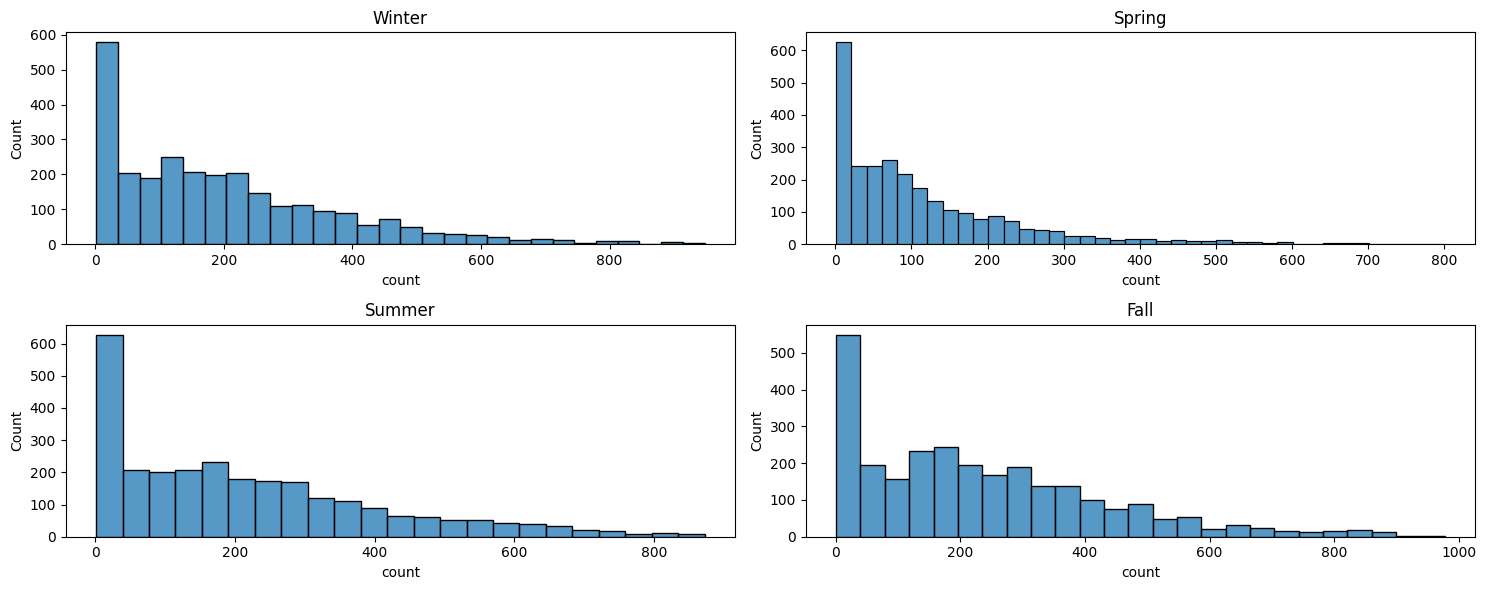

In [ ]:
plt.figure(figsize=(15, 6))  # Set the figure size

plt.subplot(2,2,1)
sns.histplot(df_Winter)
plt.title("Winter")

plt.subplot(2,2,2)
sns.histplot(df_Spring)
plt.title("Spring")

plt.subplot(2,2,3)
sns.histplot(df_Summer)
plt.title("Summer")

plt.subplot(2,2,4)
sns.histplot(df_Fall)
plt.title("Fall")

plt.tight_layout()
plt.show()

Insights:-Observed that distributions are not normal

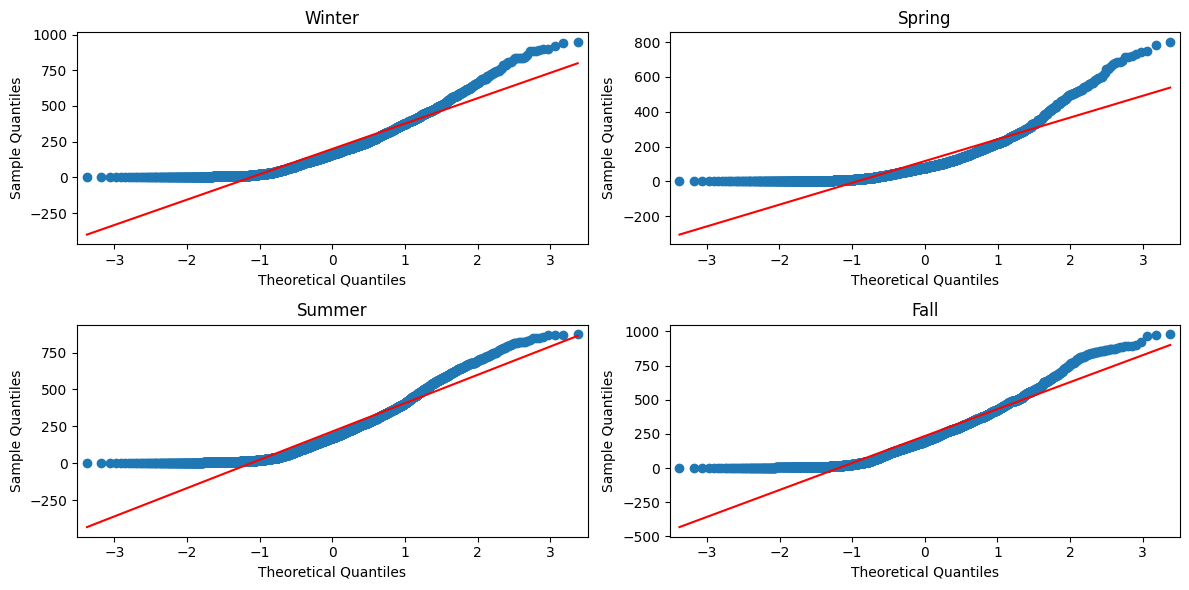

In [ ]:
from statsmodels.graphics.gofplots import qqplot

fig,axes=plt.subplots(2,2,figsize=(12,6))  #adjusting figures in a bettersize to fit in 2*2

qqplot(df_Winter,line="s",ax=axes[0,0])
axes[0,0].set_title("Winter")
qqplot(df_Spring,line="s",ax=axes[0,1])
axes[0,1].set_title("Spring")
qqplot(df_Summer,line="s",ax=axes[1,0])
axes[1,0].set_title("Summer")
qqplot(df_Fall,line="s",ax=axes[1,1])
axes[1,1].set_title("Fall")
plt.tight_layout()
plt.show()

Insights:From the above plots ,the distributions are not normal.

In [ ]:
# Shapiro-Wilk test - to check the normality of data
print(shapiro(df_Winter))
print(shapiro(df_Spring))
print(shapiro(df_Summer))
print(shapiro(df_Fall))

ShapiroResult(statistic=0.8954637482095505, pvalue=1.1299244409282836e-39)
ShapiroResult(statistic=0.8087378401253588, pvalue=8.749584618867662e-49)
ShapiroResult(statistic=0.9004818080893252, pvalue=6.039374406270491e-39)
ShapiroResult(statistic=0.9148166372899196, pvalue=1.043680518918597e-36)


Insights:Observed that distributions were not normal

In [ ]:
#levene's test - to check the variablity of the data with in each group
alpha=0.05
from scipy.stats import levene
stats,pvalue = levene(df_Winter,df_Spring,df_Summer,df_Fall)
print("stats:",stats)
print("pvalue:",pvalue)
if pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("Variances are not equal")
else:
  print("Fail to reject Null Hypothesis")
  print("Variances are equal")


stats: 187.7706624026276
pvalue: 1.0147116860043298e-118
Reject Null Hypothesis
Variances are not equal


In [ ]:
#Annova test-All groups have the same mean
#H0:All groups have the same mean
#HA:At least one group has a different
from scipy.stats import f_oneway
stats,p_value=f_oneway(df_Winter,df_Spring,df_Summer,df_Fall)
print("stats:",stats)
print("pvalue:",p_value)
if  pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("At least one group has a different mean")
else:
  print("Fail to reject Null Hypothesis")
  print("All groups have the same mean")


stats: 236.94671081032104
pvalue: 6.164843386499654e-149
Reject Null Hypothesis
At least one group has a different mean


Insights:

Observed that /we can say that there is a demand on the different seasons which is dependent.

In [ ]:
#Kruskal wall's test
#H0:All groups have the same median
#HA:At least one group has a different median
from scipy.stats import kruskal

f_stats,p_value=kruskal(df_Winter,df_Spring,df_Summer,df_Fall)

print("f_stats:",f_stats)
print("p_value:",p_value)

alpha = 0.05
if pvalue < 0.05:
  print("Reject Null Hypothesis")
  print("At least one group has a different median")
else:
  print("Fail to reject Null Hypothesis")
  print("All groups have the same median")

f_stats: 699.6668548181988
p_value: 2.479008372608633e-151
Reject Null Hypothesis
At least one group has a different median


Insights:Demand is dependent on different seasons.
pvalue -2.479008372608633e-151<0.05 .so rejecting null hypothesis..means we are considering alternative hypothesis.

# **6.Check if the Weather conditions are significantly different during different Seasons?**

In [ ]:
df1=pd.crosstab(df['weather'],df['season'])
df1

season      fall  spring  summer  winter
weather                                 
Clear       1930    1759    1801    1702
Cloudy       604     715     708     807
Heavy Rain     0       1       0       0
Light Rain   199     211     224     225

In [ ]:
#chisquare test
#H0 :  Weather conditions are independent of Seasons
# Ha :  Weather conditions are dependent on Seasons
from scipy.stats import chi2_contingency
stats,p_value,dof,expected=chi2_contingency(df1)
print("stats:",stats)
print("p_value:",p_value)

alpha = 0.05
if p_value < alpha:
  print("Rejecting H0")
  print("Weather conditions are dependent on Seasons")
else:
  print("Failed to Reject H0")
  print("Weather conditions are independent of Seasons")

stats: 49.15865559689363
p_value: 1.5499250736864862e-07
Rejecting H0
Weather conditions are dependent on Seasons


Insights:

Pvalue<0.05..rjecting null hypothesis.. so we are accepting Ha hypothesis.

Weather conditions are dependent on Seasons

## **Overall Insights:**

Demand Influences:

Working Days vs. Holidays: Demand remains relatively unaffected by whether it’s a working day or a holiday.

Weekend Patterns: There is a noticeable increase in casual users on weekends.

Weather and Seasonal Effects: Weather and season are key drivers of demand fluctuations.

Clear Weather: Highest demand.

Light Rain or Snow: Lowest demand.

Seasonal Trends: Fall, summer, and winter see higher demand, while spring experiences the lowest.

Humidity: Has minimal influence on demand.

Temperature: A significant factor; demand increases as temperature rises.

Wind Speed: Plays a minor role.

Time of Day: Has a subtle impact; demand peaks in the evening, followed by morning and afternoon, with the lowest during night and late-night hours.
Data Characteristics:

Distributions: Variables such as "temp," "atemp," and "humidity" exhibit normal distributions.
Outliers: Found in "humidity," "casual," "registered," and "count."

Impact of Seasons and Weather:

ANOVA Results: Confirm higher rentals in summer and fall, with spring showing significantly lower rentals.
Weather Impact: Rentals drop during rainy, stormy, snowy, and foggy conditions.
Correlation Insights:

Positive Correlations: Between "count" and "registered," "count" and "casual," and "count" and temperature-related variables ("temp"/"atemp").

Negative Correlation: Between "count" and humidity.

Distribution Patterns: "Count," "registered," and "casual" align with a log-normal distribution.
Yearly and Monthly Trends:

Year-on-Year Growth: Rentals surged from 2011 to 2012.

Monthly Peaks: June sees the highest rentals, while January has the fewest.

Weather Influence: Rentals are lowest on snowy days and highest on clear days.

Statistical Analysis:

2-Sample T-Test: Indicates no significant impact of working days on rental counts.

ANOVA Analysis: Shows a substantial effect of weather and seasons on rentals, with clear weather and fall leading in demand, and spring lagging.

Chi-Square Test: Confirms that weather patterns are dependent on the season

## **Overall Recommendations:**

Convert Casual Users to Registered Users:

Encourage casual users to become registered members by offering weekend sign-up discounts, aiming to grow the registered user base.
Optimize Bicycle Fleet Management:

Align bicycle deployment with demand trends to reduce costs. Scale back the number of bicycles during the low-demand spring season, and increase availability during the higher-demand summer, fall, and winter seasons.
Increase Casual User Engagement:

Implement targeted marketing strategies, such as first-time user discounts and referral incentives. Focus on promoting Yulu as a convenient commuting option on weekdays to boost casual user numbers.
Promotions During Peak Hours:

Introduce special deals during peak business hours to drive customer engagement. Tailor marketing efforts to account for weather and seasonal factors, and offer weather-specific features. Use customer data to customize promotions for different user segments.
Seasonal Marketing Campaigns:

Launch seasonal promotions to attract diverse customer groups, such as offering student discounts during summer or targeting school hours to appeal to students.
